In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rand

from midiutil import MIDIFile

%matplotlib inline

In [2]:
# Solving for time problems

bpm = 120

bps = bpm/60.
qpb = bps*4
spq = 1/qpb
ticks = 960 #set in midiutil, arbitrary resolution. Ticks per QuarterNote

print('BeatsPerMin: ', bpm)
bps = bpm/60.
print('BeatsPerSec: ', bps)
spb = 1/bps
print('SecondsPerBeat:', spb)
print('Length of 1 Bar: ', spb*4)

BeatsPerMin:  120
BeatsPerSec:  2.0
SecondsPerBeat: 0.5
Length of 1 Bar:  2.0


In [3]:
# Time Estimations - How many points of data per beat?
# Note Making

# mid C = 60

modes = {
    'ionian':[2,2,1,2,2,2,1],
    'dorian':[2,1,2,2,2,1,2],
    'phrygian':[1,2,2,2,1,2,2],
    'lydian':[2,2,2,1,2,2,1],
    'mixolydian':[2,2,1,2,2,1,2],
    'aeolian':[2,1,2,2,1,2,2],
    'lochrian':[1,2,2,1,2,2,2]
}

#Make this into a range function instead, C0 - A5 etc etc
start_note = 60 #Value to Change
octaves_to_span = 4 # Value to Change
total_semitones = octaves_to_span * 12
mode = 'ionian'

diatonics = []
accidentals = []
for octave in range(octaves_to_span):
    note = start_note + (12*octave)
    
    for interval in modes[mode]:
        diatonics.append(note)
        note = note + interval
        
last_note = start_note + (octaves_to_span*12)
diatonics.append(last_note)
print('length of Diatonics:', len(diatonics))
print('Diatonics: ', diatonics)

for i in range(total_semitones):
    note = start_note + i
    if note not in diatonics:
        accidentals.append(note)
print('Accidentals: ', accidentals)

#####Make a test midi to ensure it's all right###
track = 0
channel = 0
velocity = 100 #Constant for now
miditime = 0

mymidi = MIDIFile(1, eventtime_is_ticks=True)
mymidi.addTempo(track, miditime, bpm)

note_duration = 960 #quarternotes

for note in range(len(diatonics)):
    mymidi.addNote(track, channel, int(diatonics[note]), miditime, note_duration, velocity)
    miditime += note_duration
    
with open("MidiFiles/scaletest.mid", "wb") as output_file:
    mymidi.writeFile(output_file)

length of Diatonics: 29
Diatonics:  [60, 62, 64, 65, 67, 69, 71, 72, 74, 76, 77, 79, 81, 83, 84, 86, 88, 89, 91, 93, 95, 96, 98, 100, 101, 103, 105, 107, 108]
Accidentals:  [61, 63, 66, 68, 70, 73, 75, 78, 80, 82, 85, 87, 90, 92, 94, 97, 99, 102, 104, 106]


Time Length: 100
Data Length: 100


Text(0.5, 1.0, '100 Random Points')

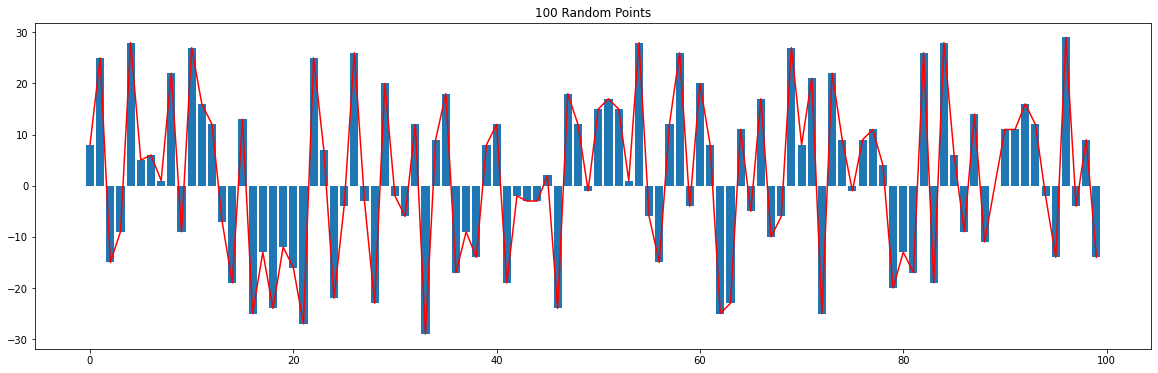

In [4]:
# Start making data

timespace = np.linspace(0, 99, num=100) # Return evenly spaced numbers over a specified interval.
print('Time Length:', len(timespace))


low = -30
high = 30
data = np.random.randint(low, high, size=100)
print('Data Length:', len(data))

fig, ax = plt.subplots(1, figsize=(20, 6))
ax.bar(timespace, data)
ax.plot(timespace, data, 'r-')
ax.set_title('100 Random Points')

length of Data: 100
minmax, median: -29 29 1.5
range data: 58
length of Diatonics: 29
length of nout: 100
minmax of nout: 0.0 28.0
midivalues out: [ 91. 105.  72.  77. 108.  88.  89.  84. 103.]


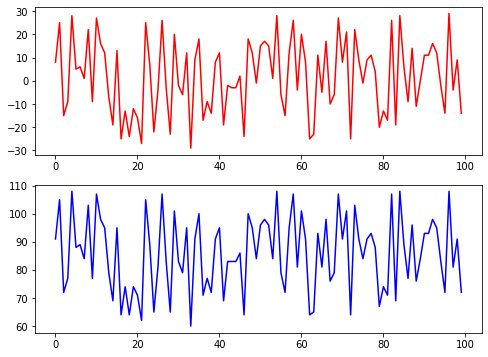

In [5]:
#conceptualizing transform
print('length of Data:', len(data))
print('minmax, median:', min(data), max(data), np.median(data))
print('range data:', max(data)-min(data))
print('length of Diatonics:', len(diatonics))

nout = np.interp(data, (data.min(), data.max()), (0, len(diatonics)-1))
print('length of nout:', len(nout))
print('minmax of nout:', min(nout), max(nout))

out = np.zeros((2, len(nout)))

for i in range(len(nout)):
    s = int(np.round(nout[i]))
    out[0,i] = data[i]
    out[1,i] = diatonics[s]
    
    
fig, ax = plt.subplots(2, figsize=(8,6))
ax[0].plot(out[0], 'r') #Data
ax[1].plot(out[1], 'b') #Midi Mapping
print('midivalues out:', out[1][0:9])

In [6]:
#Making a Midi File, arbitrary time steps

track = 0
channel = 0
velocity = 100 #Constant for now
miditime = 0

mymidi = MIDIFile(1, eventtime_is_ticks=True)
mymidi.addTempo(track, miditime, bpm)


#Things we could change
note_duration = 960 #in ticks, 960ticks = 1quarter note,  0.125seconds per quarter note at 120bpm

for note in range(len(out[1])):
    mymidi.addNote(track, channel, int(out[1,note]), miditime, note_duration, velocity)
    miditime += note_duration
    
with open("MidiFiles/randomtest.mid", "wb") as output_file:
    mymidi.writeFile(output_file)
    